In [2]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv("diabetes.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(768, 9)

In [4]:
df.head()

,embarazos,glucosa,presion,grosor_piel,insulina,bmi,fpf,edad,output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.output.value_counts()

output
0    500
1    268
Name: count, dtype: int64

In [6]:
# Normalized value counts
df.output.value_counts(normalize=True)

output
0    0.651042
1    0.348958
Name: proportion, dtype: float64

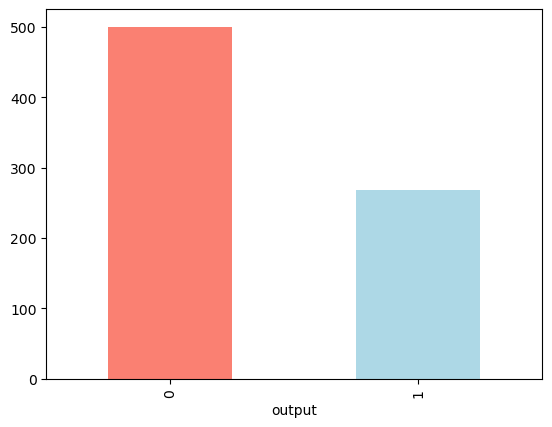

In [7]:
# Plot the value counts with a bar graph
df.output.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   embarazos    768 non-null    int64  
 1   glucosa      768 non-null    int64  
 2   presion      768 non-null    int64  
 3   grosor_piel  768 non-null    int64  
 4   insulina     768 non-null    int64  
 5   bmi          768 non-null    float64
 6   fpf          768 non-null    float64
 7   edad         768 non-null    int64  
 8   output       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,embarazos,glucosa,presion,grosor_piel,insulina,bmi,fpf,edad,output
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Diabetes Male - 1
Female - 0

In [10]:
# Compare target column with sex column
pd.crosstab(df.output, df.embarazos)

embarazos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
output,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

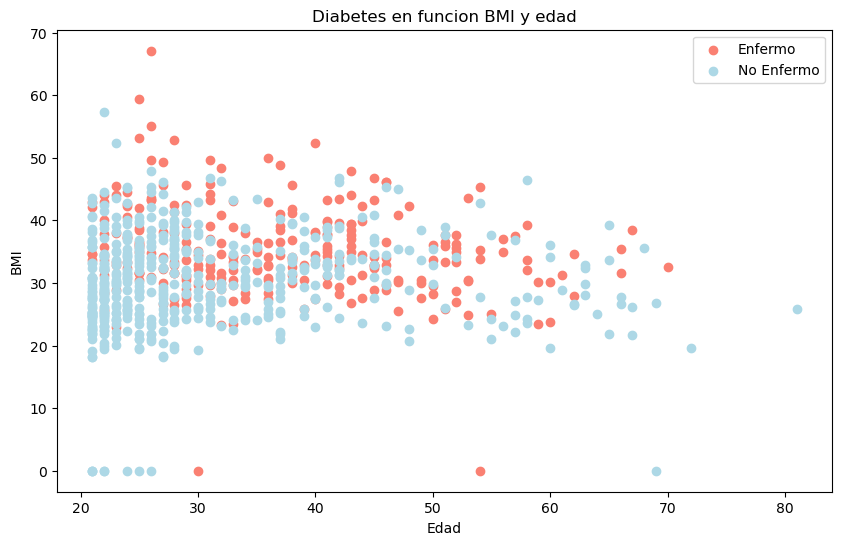

In [11]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.edad[df.output==1], 
            df.bmi[df.output==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.edad[df.output==0], 
            df.bmi[df.output==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes en funcion BMI y edad")
plt.xlabel("Edad")
plt.legend(["Enfermo", "No Enfermo"])
plt.ylabel("BMI");

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Heart Disease Frequency per Chest Pain Type

In [12]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.output).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

AttributeError: 'DataFrame' object has no attribute 'cp'

Correlation between independent variables

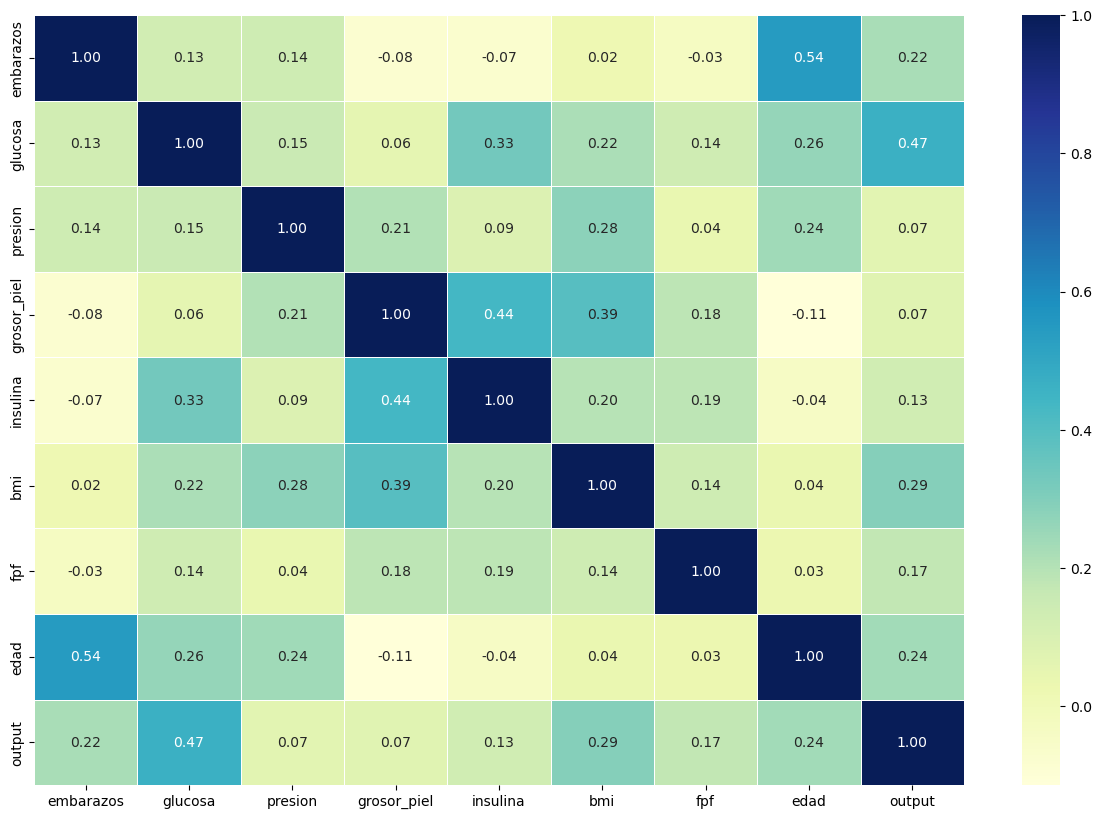

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Modeling

In [14]:
#split the target variable from the rest

# Everything except target variable
X = df.drop("output", axis=1)

# Target variable
y = df.output.values

In [15]:
# Independent variables (no target column)
X.head()

,embarazos,glucosa,presion,grosor_piel,insulina,bmi,fpf,edad
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
# Targets
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Training and test split

In [17]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [18]:
X_train.head()

,embarazos,glucosa,presion,grosor_piel,insulina,bmi,fpf,edad
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [19]:
y_train, len(y_train)

(array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [20]:
X_test.head()


,embarazos,glucosa,presion,grosor_piel,insulina,bmi,fpf,edad
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [21]:
y_test, len(y_test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       dtype=int64),
 154)

Model choices
Logistic Regression - LogisticRegression()

K-Nearest Neighbors - KNeighboursClassifier()

RandomForest - RandomForestClassifier()

In [22]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

E:\NEURONAL\env-COMIC\Scripts\ANACONDA3\envs\health\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207}

Model Comparison

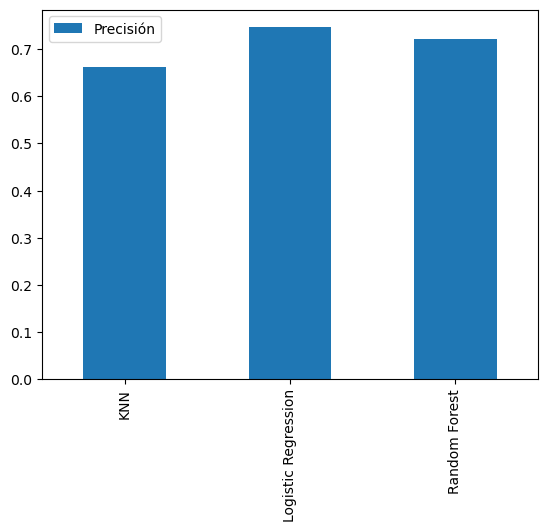

In [24]:
model_compare = pd.DataFrame(model_scores, index=['Precisión'])
model_compare.T.plot.bar();

Hyperparameter tuning and cross-validation
Tune KNeighborsClassifier (K-Nearest Neighbors or KNN)

In [25]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [26]:
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

Maximum KNN score on the test data: 77.92%


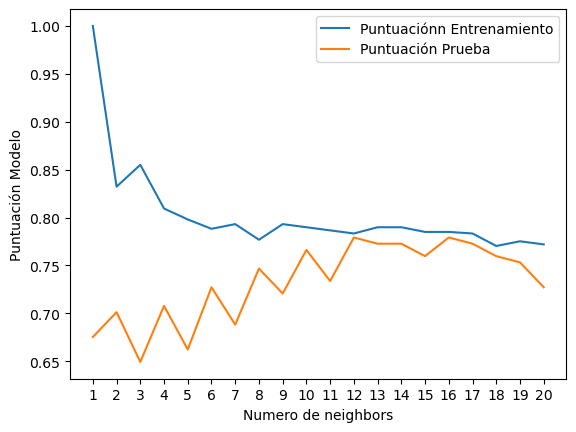

In [27]:
plt.plot(neighbors, train_scores, label="Puntuaciónn Entrenamiento")
plt.plot(neighbors, test_scores, label="Puntuación Prueba")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Numero de neighbors")
plt.ylabel("Puntuación Modelo")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Tuning models with with RandomizedSearchCV
Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [28]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [29]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [31]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [32]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [34]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7467532467532467

Tuning a model with GridSearchCV

In [35]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [37]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7597402597402597

Evaluating a classification model, beyond accuracy

ROC curve and AUC score - plot_roc_curve()

Confusion matrix - confusion_matrix()

Classification report - classification_report()

Precision - precision_score()

Recall - recall_score()

F1-score - f1_score()

We'll make predictions on the test data.

In [38]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [39]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [40]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [18 37]]


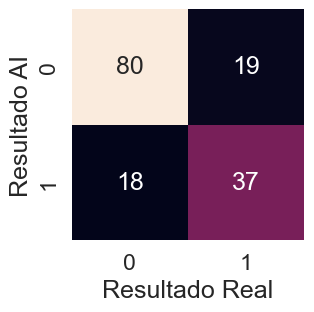

In [41]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Resultado Real")
    plt.ylabel("Resultado AI")
    
plot_conf_mat(y_test, y_preds)

Classification report

In [42]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [43]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [44]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Datos de entrenamiento (asegúrate de que tu CSV esté cargado en 'data')
data = pd.read_csv("diabetes.csv")  # Carga tu dataset aquí

# Separar las características (X) y la variable objetivo (y)
X = data.drop("output", axis=1)
y = data["output"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000),  # Incrementamos max_iter
          "Random Forest": RandomForestClassifier()}

# Entrenar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# Widgets para ingresar los datos del paciente con rangos adecuados
embarazos_widget = widgets.IntSlider(value=1, min=0, max=20, description='Embarazos:')
glucosa_widget = widgets.IntSlider(value=120, min=0, max=200, description='Glucosa:')
presion_widget = widgets.IntSlider(value=70, min=0, max=150, description='Presión art.:')
grosor_piel_widget = widgets.IntSlider(value=20, min=0, max=99, description='Grosor piel:')
insulina_widget = widgets.IntSlider(value=80, min=0, max=900, description='Insulina:')
bmi_widget = widgets.FloatSlider(value=25.0, min=0.0, max=70.0, step=0.1, description='IMC:')
dpf_widget = widgets.FloatSlider(value=0.5, min=0.0, max=2.5, step=0.01, description='Func. Pedigrí:')
edad_widget = widgets.IntSlider(value=30, min=10, max=100, description='Edad:')

# Botón para predecir
predecir_button = widgets.Button(description="Predecir Diabetes")

# Output para mostrar los resultados
output = widgets.Output()

# Función para hacer la predicción
def predecir_diabetes(b):
    # Crear un DataFrame con los datos del paciente y los nombres de las columnas correctos
    datos_paciente = pd.DataFrame([[
        embarazos_widget.value,
        glucosa_widget.value,
        presion_widget.value,
        grosor_piel_widget.value,
        insulina_widget.value,
        bmi_widget.value,
        dpf_widget.value,
        edad_widget.value
    ]], columns=X.columns)

    # Realizar predicciones con cada modelo
    with output:
        output.clear_output()
        print("Resultados de predicción para el paciente:")
        for name, model in models.items():
            prediccion = model.predict(datos_paciente)
            if prediccion[0] == 1:
                print(f"{name}: Posible diabetes")
            else:
                print(f"{name}: No hay diabetes")

# Conectar el botón a la función
predecir_button.on_click(predecir_diabetes)

# Mostrar los widgets y el botón
display(embarazos_widget, glucosa_widget, presion_widget, grosor_piel_widget, insulina_widget, bmi_widget, dpf_widget, edad_widget, predecir_button, output)


IntSlider(value=1, description='Embarazos:', max=20)

IntSlider(value=120, description='Glucosa:', max=200)

IntSlider(value=70, description='Presión art.:', max=150)

IntSlider(value=20, description='Grosor piel:', max=99)

IntSlider(value=80, description='Insulina:', max=900)

FloatSlider(value=25.0, description='IMC:', max=70.0)

FloatSlider(value=0.5, description='Func. Pedigrí:', max=2.5, step=0.01)

IntSlider(value=30, description='Edad:', min=10)

Button(description='Predecir Diabetes', style=ButtonStyle())

Output()

In [45]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Datos de entrenamiento (asegúrate de que tu CSV esté cargado en 'data')
data = pd.read_csv("diabetes.csv")  # Carga tu dataset aquí

# Separar las características (X) y la variable objetivo (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000),  # Incrementamos max_iter
          "Random Forest": RandomForestClassifier()}

# Entrenar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# Widgets para ingresar los datos del paciente con rangos adecuados
embarazos_widget = widgets.IntSlider(value=1, min=0, max=20, description='Embarazos:')
glucosa_widget = widgets.IntSlider(value=120, min=0, max=200, description='Glucosa:')
presion_widget = widgets.IntSlider(value=70, min=0, max=150, description='Presión art.:')
grosor_piel_widget = widgets.IntSlider(value=20, min=0, max=99, description='Grosor piel:')
insulina_widget = widgets.IntSlider(value=80, min=0, max=900, description='Insulina:')
bmi_widget = widgets.FloatSlider(value=25.0, min=0.0, max=70.0, step=0.1, description='IMC:')
dpf_widget = widgets.FloatSlider(value=0.5, min=0.0, max=2.5, step=0.01, description='Func. Pedigrí:')
edad_widget = widgets.IntSlider(value=30, min=10, max=100, description='Edad:')

# Botón para predecir
predecir_button = widgets.Button(description="Predecir Diabetes")

# Output para mostrar los resultados
output = widgets.Output()

# Función para hacer la predicción
def predecir_diabetes(b):
    # Crear un DataFrame con los datos del paciente y los nombres de las columnas correctos
    datos_paciente = pd.DataFrame([[
        embarazos_widget.value,
        glucosa_widget.value,
        presion_widget.value,
        grosor_piel_widget.value,
        insulina_widget.value,
        bmi_widget.value,
        dpf_widget.value,
        edad_widget.value
    ]], columns=X.columns)

    # Realizar predicciones con cada modelo
    with output:
        output.clear_output()
        print("Resultados de predicción para el paciente:")
        for name, model in models.items():
            # Predicción binaria
            prediccion = model.predict(datos_paciente)
            # Probabilidades de las clases (diabetes/no diabetes)
            probabilidad = model.predict_proba(datos_paciente)
            prob_diabetes = probabilidad[0][1] * 100  # Probabilidad de tener diabetes (clase 1)
            prob_no_diabetes = probabilidad[0][0] * 100  # Probabilidad de no tener diabetes (clase 0)
            
            if prediccion[0] == 1:
                print(f"{name}: Posible diabetes ({prob_diabetes:.2f}% probabilidad)")
            else:
                print(f"{name}: No hay diabetes ({prob_no_diabetes:.2f}% probabilidad)")

# Conectar el botón a la función
predecir_button.on_click(predecir_diabetes)

# Mostrar los widgets y el botón
display(embarazos_widget, glucosa_widget, presion_widget, grosor_piel_widget, insulina_widget, 
        bmi_widget, dpf_widget, edad_widget, predecir_button, output)


KeyError: "['Outcome'] not found in axis"